In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [34]:
base_df = pd.read_csv('(수정) WorldCupMatches.csv',encoding='cp949')
base_df.Year = base_df.Year.astype(np.int64)
base_df

Year              Datetime                     Stage  \
0    1930  13 Jul 1930 - 15:00                    Group 1   
1    1930  13 Jul 1930 - 15:00                    Group 4   
2    1930  14 Jul 1930 - 12:45                    Group 2   
3    1930  14 Jul 1930 - 14:50                    Group 3   
4    1930  15 Jul 1930 - 16:00                    Group 1   
..    ...                   ...                       ...   
847  2014  05 Jul 2014 - 17:00             Quarter-finals   
848  2014  08 Jul 2014 - 17:00                Semi-finals   
849  2014  09 Jul 2014 - 17:00                Semi-finals   
850  2014  12 Jul 2014 - 17:00   Play-off for third place   
851  2014  13 Jul 2014 - 16:00                      Final   

                 Stadium             City Home Team Name  Home Team Goals  \
0                Pocitos      Montevideo          France                4   
1         Parque Central      Montevideo             USA                3   
2         Parque Central      Montevideo      Yugoslavia                2   
3                Pocitos      Montevideo         Romania                3   
4         Parque Central      Montevideo       Argentina                1   
..                   ...              ...            ...              ...   
847     Arena Fonte Nova        Salvador     Netherlands                0   
848     Estadio Mineirao  Belo Horizonte          Brazil                1   
849   Arena de Sao Paulo       Sao Paulo     Netherlands                0   
850     Estadio Nacional        Brasilia          Brazil                0   
851  Estadio do Maracana  Rio De Janeiro         Germany                1   

     Away Team Goals Away Team Name  Attendance  ...  Half-time Away Goals  \
0                  1         Mexico      4444.0  ...                     0   
1                  0        Belgium     18346.0  ...                     0   
2                  1         Brazil     24059.0  ...                     0   
3                  1           Peru      2549.0  ...                     0   
4                  0         France     23409.0  ...                     0   
..               ...            ...         ...  ...                   ...   
847                0     Costa Rica     51179.0  ...                     0   
848                7        Germany     58141.0  ...                     5   
849                0      Argentina     63267.0  ...                     0   
850                3    Netherlands     68034.0  ...                     2   
851                0      Argentina     74738.0  ...                     0   

                    Referee                  Assistant 1  \
0    LOMBARDI Domingo (URU)        CRISTOPHE Henry (BEL)   
1         MACIAS Jose (ARG)     MATEUCCI Francisco (URU)   
2       TEJADA Anibal (URU)      VALLARINO Ricardo (URU)   
3     WARNKEN Alberto (CHI)          LANGENUS Jean (BEL)   
4       REGO Gilberto (BRA)         SAUCEDO Ulises (BOL)   
..                      ...                          ...   
847   Ravshan IRMATOV (UZB)  RASULOV Abduxamidullo (UZB)   
848   RODRIGUEZ Marco (MEX)      TORRENTERA Marvin (MEX)   
849      C체neyt 횉AKIR (TUR)         DURAN Bahattin (TUR)   
850   HAIMOUDI Djamel (ALG)         ACHIK Redouane (MAR)   
851    Nicola RIZZOLI (ITA)        Renato FAVERANI (ITA)   

                    Assistant 2 RoundID    MatchID  Home Team Initials  \
0           REGO Gilberto (BRA)     201       1096                 FRA   
1         WARNKEN Alberto (CHI)     201       1090                 USA   
2           BALWAY Thomas (FRA)     201       1093                 YUG   
3      MATEUCCI Francisco (URU)     201       1098                 ROU   
4    RADULESCU Constantin (ROU)     201       1085                 ARG   
..                          ...     ...        ...                 ...   
847    KOCHKAROV Bakhadyr (KGZ)  255953  300186488                 NED   
848       QUINTERO Marcos (MEX)  255955  300186474                 BRA   
849           ONGUN Tar

In [35]:
prob_dict = {}
game_count = {}
continent_dict = {}


for y in base_df.Year.unique():
    tmp = base_df[base_df['Year']==y]
    win_dcit = {}
    game_dict = {}
    continent_dict_country = defaultdict(list)
    for idx, (v, co) in enumerate(zip(tmp[['Home Team Name','Home Team Goals','Away Team Goals','Away Team Name']].values, tmp[['HomeContinent','AwayContinent']].values)):
        cnt, cnt2 = 0, 0
        game_dict[v[0]] = cnt2+1 if v[0] not in game_dict.keys() else game_dict[v[0]]+1
        game_dict[v[-1]] = cnt2+1 if v[-1] not in game_dict.keys() else game_dict[v[-1]]+1

        if v[0] not in continent_dict_country[co[0]]:
            continent_dict_country[co[0]].append(v[0])
        if v[-1] not in continent_dict_country[co[-1]]:
            continent_dict_country[co[-1]].append(v[-1])
        if v[1] > v[2]:
            win_dcit[v[0]] = cnt+1 if v[0] not in win_dcit.keys() else win_dcit[v[0]]+1
            win_dcit[v[-1]] = 0 if v[-1] not in win_dcit.keys() else win_dcit[v[-1]]
        elif v[1] < v[2]:
            win_dcit[v[-1]] = cnt+1 if v[-1] not in win_dcit.keys() else win_dcit[v[-1]]+1
            win_dcit[v[0]] = 0 if v[0] not in win_dcit.keys() else win_dcit[v[0]]
        else:
            win_dcit[v[-1]] = 0 if v[-1] not in win_dcit.keys() else win_dcit[v[-1]]
            win_dcit[v[0]] = 0 if v[0] not in win_dcit.keys() else win_dcit[v[0]]
    prob_dict[y] = win_dcit
    game_count[y] = game_dict
    continent_dict[y] = continent_dict_country


In [36]:

wr_continent_dict = {}
for y in base_df.Year.unique():
    tmp_country = {}
    for k,v in continent_dict[y].items():
        game, win = 0, 0
        for vv in v:
            game += game_count[y][vv]
            win += prob_dict[y][vv]
        tmp_country[k] = np.round(win/game,2)
    wr_continent_dict[y] = tmp_country

In [147]:
info_df = pd.read_csv('(수정)+WorldCupsSummary.csv')
info_df = info_df.iloc[:-1, :]
info_df

Year           HostCountry      Winner          Second        Third  \
0   1930               Uruguay     Uruguay       Argentina          USA   
1   1934                 Italy       Italy  Czechoslovakia      Germany   
2   1938                France       Italy         Hungary       Brazil   
3   1950                Brazil     Uruguay          Brazil       Sweden   
4   1954           Switzerland  Germany FR         Hungary      Austria   
5   1958                Sweden      Brazil          Sweden       France   
6   1962                 Chile      Brazil  Czechoslovakia        Chile   
7   1966               England     England      Germany FR     Portugal   
8   1970                Mexico      Brazil           Italy   Germany FR   
9   1974            Germany FR  Germany FR     Netherlands       Poland   
10  1978             Argentina   Argentina     Netherlands       Brazil   
11  1982                 Spain       Italy      Germany FR       Poland   
12  1986                Mexico   Argentina      Germany FR       France   
13  1990                 Italy  Germany FR       Argentina        Italy   
14  1994                   USA      Brazil           Italy       Sweden   
15  1998                France      France          Brazil      Croatia   
16  2002  Korea Republic/Japan      Brazil         Germany       Turkey   
17  2006               Germany       Italy          France      Germany   
18  2010          South Africa       Spain     Netherlands      Germany   
19  2014                Brazil     Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed  Attendance  \
0       Yugoslavia           70              13             18      590549   
1          Austria           70              16             17      363000   
2           Sweden           84              15             18      375700   
3            Spain           88              13             22     1045246   
4          Uruguay          140              16             26      768607   
5       Germany FR          126              16             35      819810   
6       Yugoslavia           89              16             32      893172   
7     Soviet Union           89              16             32     1563135   
8          Uruguay           95              16             32     1603975   
9           Brazil           97              16             38     1865753   
10           Italy          102              16             38     1545791   
11          France          146              24             52     2109723   
12         Belgium          132              24             52     2394031   
13         England          115              24             52     2516215   
14        Bulgaria          141              24             52     3587538   
15     Netherlands          171              32             64     2785100   
16  Korea Republic          161              32             64     2705197   
17        Portugal          147              32             64     3359439   
18         Uruguay          145              32             64     3178856   
19          Brazil          171              32             64     3386810   

    HostContinent WinnerContinent SecondContinent ThirdContinent  \
0   South America   South America   South America  North America   
1          Europe          Europe          Europe         Europe   
2          Europe          Europe          Europe  South America   
3   South America   South America   South America         Europe   
4          Europe          Europe          Europe         Europe   
5          Europe   South America          Europe         Europe   
6   South America   South America          Europe  South America   
7          Europe          Europe          Europe         Europe   
8   North America   South America          Europe         Europe   
9          Europe          Europe          Europe         Europe   
10  South America   South America        

In [148]:
win_rate = np.zeros((len(info_df['Year'].unique()), 5))

for i, y in enumerate(info_df['Year'].unique()):
    if y!=2018:
        tmp = info_df[info_df['Year']==y]
        country_info = tmp.iloc[0, 1:6].values

        for idx, c in enumerate(country_info):
            if '/' in c:
                c1, c2 = c.split('/')
                win_rate[i, idx] = np.round(prob_dict[y][c1]/game_count[y][c1],2)
                win_rate[i, idx] = np.round(prob_dict[y][c2]/game_count[y][c2],2)
            else:
                win_rate[i, idx] = np.round(prob_dict[y][c]/game_count[y][c],2)


In [149]:
col = ['host_winrate', 'winner_winrate', 'second_winrate', 'third_winrate', 'fourth_winrate']
info_df[col] = win_rate

In [150]:
info_df['host_continent_winrate'] = [v[info_df.loc[i, 'HostContinent']] for i, (y, v) in enumerate(wr_continent_dict.items())]
info_df

Year           HostCountry      Winner          Second        Third  \
0   1930               Uruguay     Uruguay       Argentina          USA   
1   1934                 Italy       Italy  Czechoslovakia      Germany   
2   1938                France       Italy         Hungary       Brazil   
3   1950                Brazil     Uruguay          Brazil       Sweden   
4   1954           Switzerland  Germany FR         Hungary      Austria   
5   1958                Sweden      Brazil          Sweden       France   
6   1962                 Chile      Brazil  Czechoslovakia        Chile   
7   1966               England     England      Germany FR     Portugal   
8   1970                Mexico      Brazil           Italy   Germany FR   
9   1974            Germany FR  Germany FR     Netherlands       Poland   
10  1978             Argentina   Argentina     Netherlands       Brazil   
11  1982                 Spain       Italy      Germany FR       Poland   
12  1986                Mexico   Argentina      Germany FR       France   
13  1990                 Italy  Germany FR       Argentina        Italy   
14  1994                   USA      Brazil           Italy       Sweden   
15  1998                France      France          Brazil      Croatia   
16  2002  Korea Republic/Japan      Brazil         Germany       Turkey   
17  2006               Germany       Italy          France      Germany   
18  2010          South Africa       Spain     Netherlands      Germany   
19  2014                Brazil     Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed  Attendance  \
0       Yugoslavia           70              13             18      590549   
1          Austria           70              16             17      363000   
2           Sweden           84              15             18      375700   
3            Spain           88              13             22     1045246   
4          Uruguay          140              16             26      768607   
5       Germany FR          126              16             35      819810   
6       Yugoslavia           89              16             32      893172   
7     Soviet Union           89              16             32     1563135   
8          Uruguay           95              16             32     1603975   
9           Brazil           97              16             38     1865753   
10           Italy          102              16             38     1545791   
11          France          146              24             52     2109723   
12         Belgium          132              24             52     2394031   
13         England          115              24             52     2516215   
14        Bulgaria          141              24             52     3587538   
15     Netherlands          171              32             64     2785100   
16  Korea Republic          161              32             64     2705197   
17        Portugal          147              32             64     3359439   
18         Uruguay          145              32             64     3178856   
19          Brazil          171              32             64     3386810   

    ... WinnerContinent SecondContinent ThirdContinent FourthContinent  \
0   ...   South America   South America  North America          Europe   
1   ...          Europe          Europe         Europe          Europe   
2   ...          Europe          Europe  South America          Europe   
3   ...   South America   South America         Europe          Europe   
4   ...          Europe          Europe         Europe   South America   
5   ...   South America          Europe         Europe          Europe   
6   ...   South America          Europe  South America          Europe   
7   ...          Europe          Europe         Europe          Europe   
8   ...   South America          Europe         Europe   South America   
9   ...          Europe          Europe         E

In [151]:
info_col = ['GoalsScored','QualifiedTeams','MatchesPlayed', 'Attendance']
info_v_df = info_df.drop(info_col, axis=1)
info_v_df

Year           HostCountry      Winner          Second        Third  \
0   1930               Uruguay     Uruguay       Argentina          USA   
1   1934                 Italy       Italy  Czechoslovakia      Germany   
2   1938                France       Italy         Hungary       Brazil   
3   1950                Brazil     Uruguay          Brazil       Sweden   
4   1954           Switzerland  Germany FR         Hungary      Austria   
5   1958                Sweden      Brazil          Sweden       France   
6   1962                 Chile      Brazil  Czechoslovakia        Chile   
7   1966               England     England      Germany FR     Portugal   
8   1970                Mexico      Brazil           Italy   Germany FR   
9   1974            Germany FR  Germany FR     Netherlands       Poland   
10  1978             Argentina   Argentina     Netherlands       Brazil   
11  1982                 Spain       Italy      Germany FR       Poland   
12  1986                Mexico   Argentina      Germany FR       France   
13  1990                 Italy  Germany FR       Argentina        Italy   
14  1994                   USA      Brazil           Italy       Sweden   
15  1998                France      France          Brazil      Croatia   
16  2002  Korea Republic/Japan      Brazil         Germany       Turkey   
17  2006               Germany       Italy          France      Germany   
18  2010          South Africa       Spain     Netherlands      Germany   
19  2014                Brazil     Germany       Argentina  Netherlands   

            Fourth  HostContinent WinnerContinent SecondContinent  \
0       Yugoslavia  South America   South America   South America   
1          Austria         Europe          Europe          Europe   
2           Sweden         Europe          Europe          Europe   
3            Spain  South America   South America   South America   
4          Uruguay         Europe          Europe          Europe   
5       Germany FR         Europe   South America          Europe   
6       Yugoslavia  South America   South America          Europe   
7     Soviet Union         Europe          Europe          Europe   
8          Uruguay  North America   South America          Europe   
9           Brazil         Europe          Europe          Europe   
10           Italy  South America   South America          Europe   
11          France         Europe          Europe          Europe   
12         Belgium  North America   South America          Europe   
13         England         Europe          Europe   South America   
14        Bulgaria  North America   South America          Europe   
15     Netherlands         Europe          Europe   South America   
16  Korea Republic           Asia   South America          Europe   
17        Portugal         Europe          Europe          Europe   
18         Uruguay         Africa          Europe          Europe   
19          Brazil  South America          Europe   South America   

   ThirdContinent FourthContinent  host_winrate  winner_winrate  \
0   North America          Europe          1.00            1.00   
1          Europe          Europe          0.80            0.80   
2   South America          Europe          0.50            1.00   
3          Europe          Europe          0.67            0.75   
4          Europe   South America          0.50            0.83   
5          Europe          Europe          0.67            0.83   
6   South America          Europe          0.67            0.83   
7          Europe          Europe          0.83            0.83   
8          Europe   South America          0.50            1.00   
9          Europe   South America          0.86            0.86   
10  South America          Europe          0.71            0.71   
11         Europe          Europe          0.20            0.57   
12         Europe          Europe          0.60            0.86   
13         Europe          Europe       

In [152]:
top_cnt = []
top_rate = []
for i, ((k,v),h) in enumerate(zip(continent_dict.items(),info_v_df.HostContinent.values)):
    top = info_v_df[['WinnerContinent','SecondContinent','ThirdContinent','FourthContinent']].values[i]
    cnt = 0

    for c in top:
        if h==c:
            cnt+=1
    top_rate.append(np.round(cnt/len(v),2))
    top_cnt.append(cnt)
    


info_v_df['top_hostcontinent_cnt'] = top_cnt
info_v_df['top_hostcontinent_rate'] = top_rate


info_v_df

Year           HostCountry      Winner          Second        Third  \
0   1930               Uruguay     Uruguay       Argentina          USA   
1   1934                 Italy       Italy  Czechoslovakia      Germany   
2   1938                France       Italy         Hungary       Brazil   
3   1950                Brazil     Uruguay          Brazil       Sweden   
4   1954           Switzerland  Germany FR         Hungary      Austria   
5   1958                Sweden      Brazil          Sweden       France   
6   1962                 Chile      Brazil  Czechoslovakia        Chile   
7   1966               England     England      Germany FR     Portugal   
8   1970                Mexico      Brazil           Italy   Germany FR   
9   1974            Germany FR  Germany FR     Netherlands       Poland   
10  1978             Argentina   Argentina     Netherlands       Brazil   
11  1982                 Spain       Italy      Germany FR       Poland   
12  1986                Mexico   Argentina      Germany FR       France   
13  1990                 Italy  Germany FR       Argentina        Italy   
14  1994                   USA      Brazil           Italy       Sweden   
15  1998                France      France          Brazil      Croatia   
16  2002  Korea Republic/Japan      Brazil         Germany       Turkey   
17  2006               Germany       Italy          France      Germany   
18  2010          South Africa       Spain     Netherlands      Germany   
19  2014                Brazil     Germany       Argentina  Netherlands   

            Fourth  HostContinent WinnerContinent SecondContinent  \
0       Yugoslavia  South America   South America   South America   
1          Austria         Europe          Europe          Europe   
2           Sweden         Europe          Europe          Europe   
3            Spain  South America   South America   South America   
4          Uruguay         Europe          Europe          Europe   
5       Germany FR         Europe   South America          Europe   
6       Yugoslavia  South America   South America          Europe   
7     Soviet Union         Europe          Europe          Europe   
8          Uruguay  North America   South America          Europe   
9           Brazil         Europe          Europe          Europe   
10           Italy  South America   South America          Europe   
11          France         Europe          Europe          Europe   
12         Belgium  North America   South America          Europe   
13         England         Europe          Europe   South America   
14        Bulgaria  North America   South America          Europe   
15     Netherlands         Europe          Europe   South America   
16  Korea Republic           Asia   South America          Europe   
17        Portugal         Europe          Europe          Europe   
18         Uruguay         Africa          Europe          Europe   
19          Brazil  South America          Europe   South America   

   ThirdContinent FourthContinent  host_winrate  winner_winrate  \
0   North America          Europe          1.00            1.00   
1          Europe          Europe          0.80            0.80   
2   South America          Europe          0.50            1.00   
3          Europe          Europe          0.67            0.75   
4          Europe   South America          0.50            0.83   
5          Europe          Europe          0.67            0.83   
6   South America          Europe          0.67            0.83   
7          Europe          Europe          0.83            0.83   
8          Europe   South America          0.50            1.00   
9          Europe   South America          0.86            0.86   
10  South America          Europe          0.71            0.71   
11         Europe          Europe          0.20            0.57   
12         Europe          Europe          0.60            0.86   
13         Europe          Europe       

In [153]:
country_dict = {}
for i, v in enumerate(info_v_df.HostCountry.values):  
    if '/' in v:
        country_dict[v] = 0
        c1, c2 = v.split('/')
        country_dict[c1] = i
        country_dict[c2] = i + 1
    else:
        country_dict[v] = len(info_v_df) + i

In [154]:
continent_no_dict = {}
sv = 100
for i, v in enumerate(info_v_df.HostContinent.values):
    if v in continent_no_dict.keys():
        pass
    else:
        continent_no_dict[v] = sv
        sv += 1

In [155]:
info_nu_df = info_v_df.copy()

In [156]:
info_nu_df['HostCountry'] = [country_dict[v] for v in info_v_df.HostCountry.values]
info_nu_df['HostContinent'] = [continent_no_dict[v] for v in info_v_df.HostContinent.values]

In [157]:
info_nu_df

Year  HostCountry      Winner          Second        Third  \
0   1930           20     Uruguay       Argentina          USA   
1   1934           33       Italy  Czechoslovakia      Germany   
2   1938           35       Italy         Hungary       Brazil   
3   1950           39     Uruguay          Brazil       Sweden   
4   1954           24  Germany FR         Hungary      Austria   
5   1958           25      Brazil          Sweden       France   
6   1962           26      Brazil  Czechoslovakia        Chile   
7   1966           27     England      Germany FR     Portugal   
8   1970           32      Brazil           Italy   Germany FR   
9   1974           29  Germany FR     Netherlands       Poland   
10  1978           30   Argentina     Netherlands       Brazil   
11  1982           31       Italy      Germany FR       Poland   
12  1986           32   Argentina      Germany FR       France   
13  1990           33  Germany FR       Argentina        Italy   
14  1994           34      Brazil           Italy       Sweden   
15  1998           35      France          Brazil      Croatia   
16  2002            0      Brazil         Germany       Turkey   
17  2006           37       Italy          France      Germany   
18  2010           38       Spain     Netherlands      Germany   
19  2014           39     Germany       Argentina  Netherlands   

            Fourth  HostContinent WinnerContinent SecondContinent  \
0       Yugoslavia            100   South America   South America   
1          Austria            101          Europe          Europe   
2           Sweden            101          Europe          Europe   
3            Spain            100   South America   South America   
4          Uruguay            101          Europe          Europe   
5       Germany FR            101   South America          Europe   
6       Yugoslavia            100   South America          Europe   
7     Soviet Union            101          Europe          Europe   
8          Uruguay            102   South America          Europe   
9           Brazil            101          Europe          Europe   
10           Italy            100   South America          Europe   
11          France            101          Europe          Europe   
12         Belgium            102   South America          Europe   
13         England            101          Europe   South America   
14        Bulgaria            102   South America          Europe   
15     Netherlands            101          Europe   South America   
16  Korea Republic            103   South America          Europe   
17        Portugal            101          Europe          Europe   
18         Uruguay            104          Europe          Europe   
19          Brazil            100          Europe   South America   

   ThirdContinent FourthContinent  host_winrate  winner_winrate  \
0   North America          Europe          1.00            1.00   
1          Europe          Europe          0.80            0.80   
2   South America          Europe          0.50            1.00   
3          Europe          Europe          0.67            0.75   
4          Europe   South America          0.50            0.83   
5          Europe          Europe          0.67            0.83   
6   South America          Europe          0.67            0.83   
7          Europe          Europe          0.83            0.83   
8          Europe   South America          0.50            1.00   
9          Europe   South America          0.86            0.86   
10  South America          Europe          0.71            0.71   
11         Europe          Europe          0.20            0.57   
12         Europe          Europe          0.60            0.86   
13         Europe          Europe          0.86            0.71   
14         Europe          Europe          0.25            0.71   
15         Europe          Europe          0.86            0.86   
16         Europe           

In [158]:
def embedd_str(in_dict, vals, sv):
    encode_values = []

    for v in vals:
        if v in in_dict.keys():
            encode_values.append(in_dict[v])
        else:
            embbed = sv
            in_dict[v] = embbed
            sv +=1
            encode_values.append(embbed)
    return encode_values, in_dict

In [159]:
info_nu_df['Winner'], country_dict = embedd_str(in_dict=country_dict,vals=info_v_df.Winner.values, sv=max(country_dict.values())+1)
info_nu_df['Second'], country_dict = embedd_str(in_dict=country_dict,vals=info_v_df.Second.values, sv=max(country_dict.values())+1)
info_nu_df['Third'], country_dict = embedd_str(in_dict=country_dict,vals=info_v_df.Third.values, sv=max(country_dict.values())+1)
info_nu_df['Fourth'], country_dict = embedd_str(in_dict=country_dict,vals=info_v_df.Fourth.values, sv=max(country_dict.values())+1)

In [160]:
info_nu_df['WinnerContinent'], continent_no_dict = embedd_str(in_dict=continent_no_dict,vals=info_v_df.WinnerContinent.values, sv=max(continent_no_dict.values())+1)
info_nu_df['SecondContinent'], continent_no_dict = embedd_str(in_dict=continent_no_dict,vals=info_v_df.SecondContinent.values, sv=max(continent_no_dict.values())+1)
info_nu_df['ThirdContinent'], continent_no_dict = embedd_str(in_dict=continent_no_dict,vals=info_v_df.ThirdContinent.values, sv=max(continent_no_dict.values())+1)
info_nu_df['FourthContinent'], continent_no_dict = embedd_str(in_dict=continent_no_dict,vals=info_v_df.FourthContinent.values, sv=max(continent_no_dict.values())+1)

In [161]:

info_nu_df

Year  HostCountry  Winner  Second  Third  Fourth  HostContinent  \
0   1930           20      20      30     34      48            100   
1   1934           33      33      40     37      43            101   
2   1938           35      33      41     39      25            101   
3   1950           39      20      39     25      31            100   
4   1954           24      29      41     43      20            101   
5   1958           25      39      25     35      29            101   
6   1962           26      39      40     26      48            100   
7   1966           27      27      29     44      49            101   
8   1970           32      39      33     29      20            102   
9   1974           29      29      42     45      39            101   
10  1978           30      30      42     39      33            100   
11  1982           31      33      29     45      35            101   
12  1986           32      30      29     35      50            102   
13  1990           33      29      30     33      27            101   
14  1994           34      39      33     25      51            102   
15  1998           35      35      39     46      42            101   
16  2002            0      39      37     47      16            103   
17  2006           37      33      35     37      44            101   
18  2010           38      31      42     37      20            104   
19  2014           39      37      30     42      39            100   

    WinnerContinent  SecondContinent  ThirdContinent  FourthContinent  \
0               100              100             102              101   
1               101              101             101              101   
2               101              101             100              101   
3               100              100             101              101   
4               101              101             101              100   
5               100              101             101              101   
6               100              101             100              101   
7               101              101             101              101   
8               100              101             101              100   
9               101              101             101              100   
10              100              101             100              101   
11              101              101             101              101   
12              100              101             101              101   
13              101              100             101              101   
14              100              101             101              101   
15              101              100             101              101   
16              100              101             101              103   
17              101              101             101              101   
18              101              101             101              100   
19              101              100             101              100   

    host_winrate  winner_winrate  second_winrate  third_winrate  \
0           1.00            1.00            0.80           0.67   
1           0.80            0.80            0.75           0.75   
2           0.50            1.00            0.75           0.60   
3           0.67            0.75            0.67           0.40   
4           0.50            0.83            0.80           0.80   
5           0.67            0.83            0.67           0.67   
6           0.67            0.83            0.50           0.67   
7           0.83            0.83            0.67           0.83   
8           0.50            1.00            0.50           0.83   
9           0.86            0.86            0.71           0.86   
10          0.71            0.71            0.43           0.57   
11          0.20            0.57            0.43           0.43   
12          0.60            0.86            0.43           0.57   
13          0.86            0.71        

In [162]:
info_nu_df['host_win_match'] = info_nu_df[['HostCountry', 'Winner']].apply(lambda x : x.HostCountry==x.Winner,axis=1).astype(int)

In [163]:
info_nu_df

Year  HostCountry  Winner  Second  Third  Fourth  HostContinent  \
0   1930           20      20      30     34      48            100   
1   1934           33      33      40     37      43            101   
2   1938           35      33      41     39      25            101   
3   1950           39      20      39     25      31            100   
4   1954           24      29      41     43      20            101   
5   1958           25      39      25     35      29            101   
6   1962           26      39      40     26      48            100   
7   1966           27      27      29     44      49            101   
8   1970           32      39      33     29      20            102   
9   1974           29      29      42     45      39            101   
10  1978           30      30      42     39      33            100   
11  1982           31      33      29     45      35            101   
12  1986           32      30      29     35      50            102   
13  1990           33      29      30     33      27            101   
14  1994           34      39      33     25      51            102   
15  1998           35      35      39     46      42            101   
16  2002            0      39      37     47      16            103   
17  2006           37      33      35     37      44            101   
18  2010           38      31      42     37      20            104   
19  2014           39      37      30     42      39            100   

    WinnerContinent  SecondContinent  ThirdContinent  FourthContinent  \
0               100              100             102              101   
1               101              101             101              101   
2               101              101             100              101   
3               100              100             101              101   
4               101              101             101              100   
5               100              101             101              101   
6               100              101             100              101   
7               101              101             101              101   
8               100              101             101              100   
9               101              101             101              100   
10              100              101             100              101   
11              101              101             101              101   
12              100              101             101              101   
13              101              100             101              101   
14              100              101             101              101   
15              101              100             101              101   
16              100              101             101              103   
17              101              101             101              101   
18              101              101             101              100   
19              101              100             101              100   

    host_winrate  winner_winrate  second_winrate  third_winrate  \
0           1.00            1.00            0.80           0.67   
1           0.80            0.80            0.75           0.75   
2           0.50            1.00            0.75           0.60   
3           0.67            0.75            0.67           0.40   
4           0.50            0.83            0.80           0.80   
5           0.67            0.83            0.67           0.67   
6           0.67            0.83            0.50           0.67   
7           0.83            0.83            0.67           0.83   
8           0.50            1.00            0.50           0.83   
9           0.86            0.86            0.71           0.86   
10          0.71            0.71            0.43           0.57   
11          0.20            0.57            0.43           0.43   
12          0.60            0.86            0.43           0.57   
13          0.86            0.71        

## Corr

<AxesSubplot:>

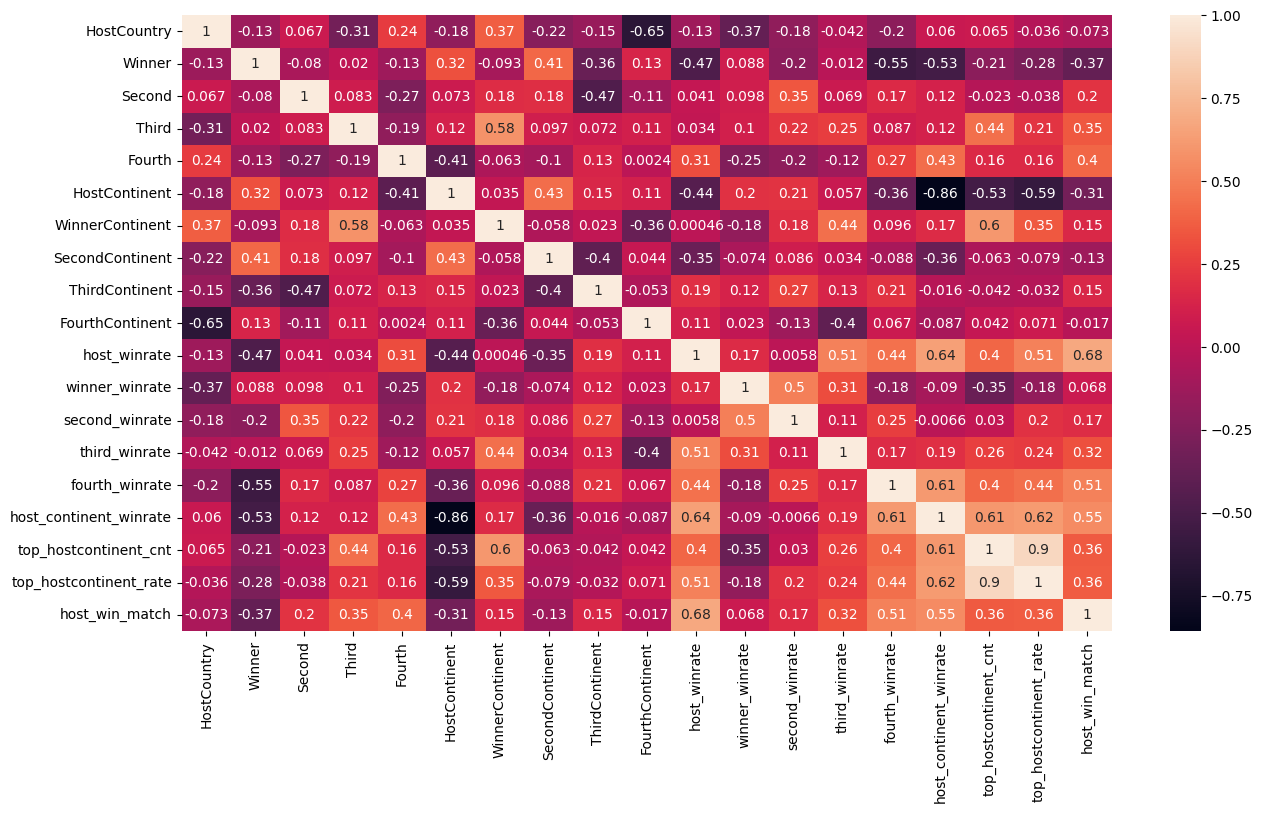

In [164]:
plt.figure(figsize=(15,8))
sns.heatmap(info_nu_df.iloc[:, 1:].corr(), annot=True)



## 개최 대륙에 속한 국가들이 top 4에 들어간 횟수와 비율

In [167]:
info_v_df['year-continent'] = info_v_df[['Year', 'HostContinent']].apply(lambda x : "{0}-{1}".format(x.Year, x.HostContinent),axis=1)

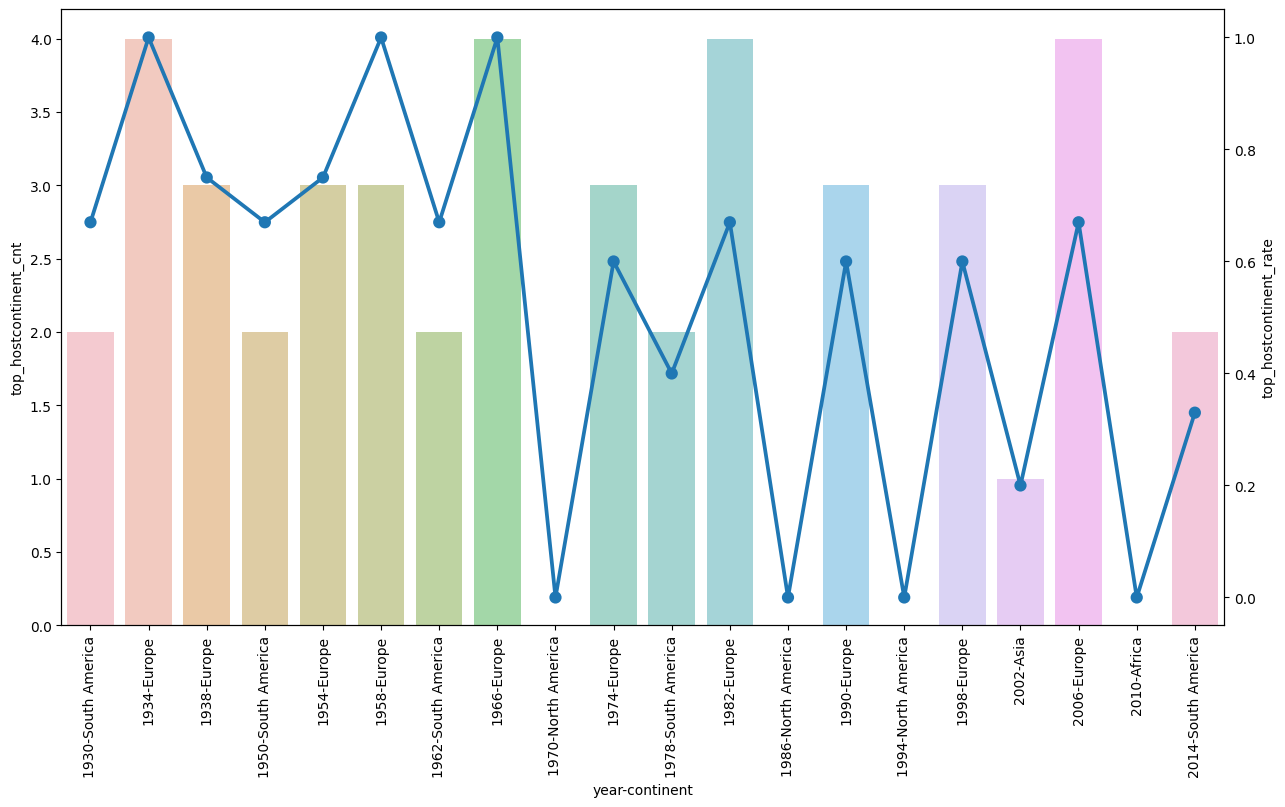

In [171]:
figure1, ((ax1)) = plt.subplots(nrows=1, ncols=1) 
figure1.set_size_inches(15, 8)

ax2 = ax1.twinx()
sns.pointplot(x='year-continent', y='top_hostcontinent_rate', data=info_v_df,ax=ax2)
sns.barplot(data = info_v_df, x='year-continent', y='top_hostcontinent_cnt', alpha=0.5, ax=ax1)
ax1.tick_params(axis='x', rotation=90)

## 개최 대륙 별 평균 승률 그래프

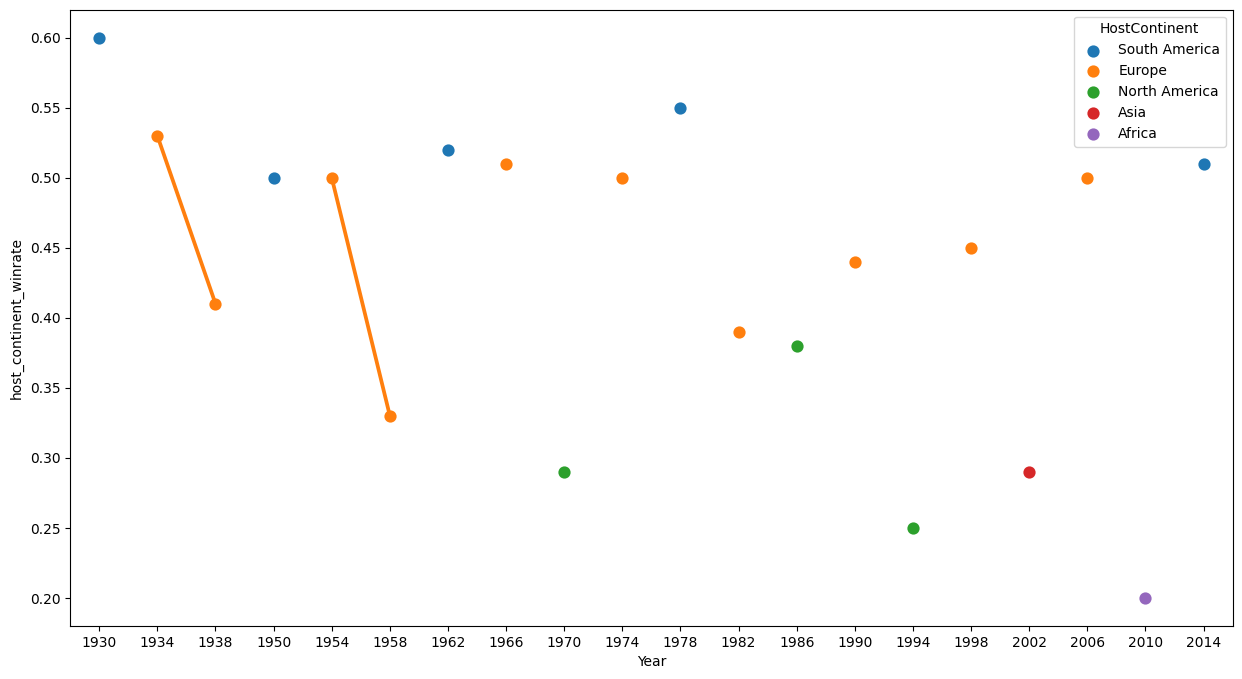

In [201]:
figure2, ((ax3)) = plt.subplots(nrows=1, ncols=1) 
figure2.set_size_inches(15, 8)
xlabel = info_v_df['year-continent'].values
g = sns.pointplot(data= info_v_df, x='Year',y='host_continent_winrate',hue='HostContinent',ax=ax3)
# ax3.tick_params(axis='x', rotation=90)

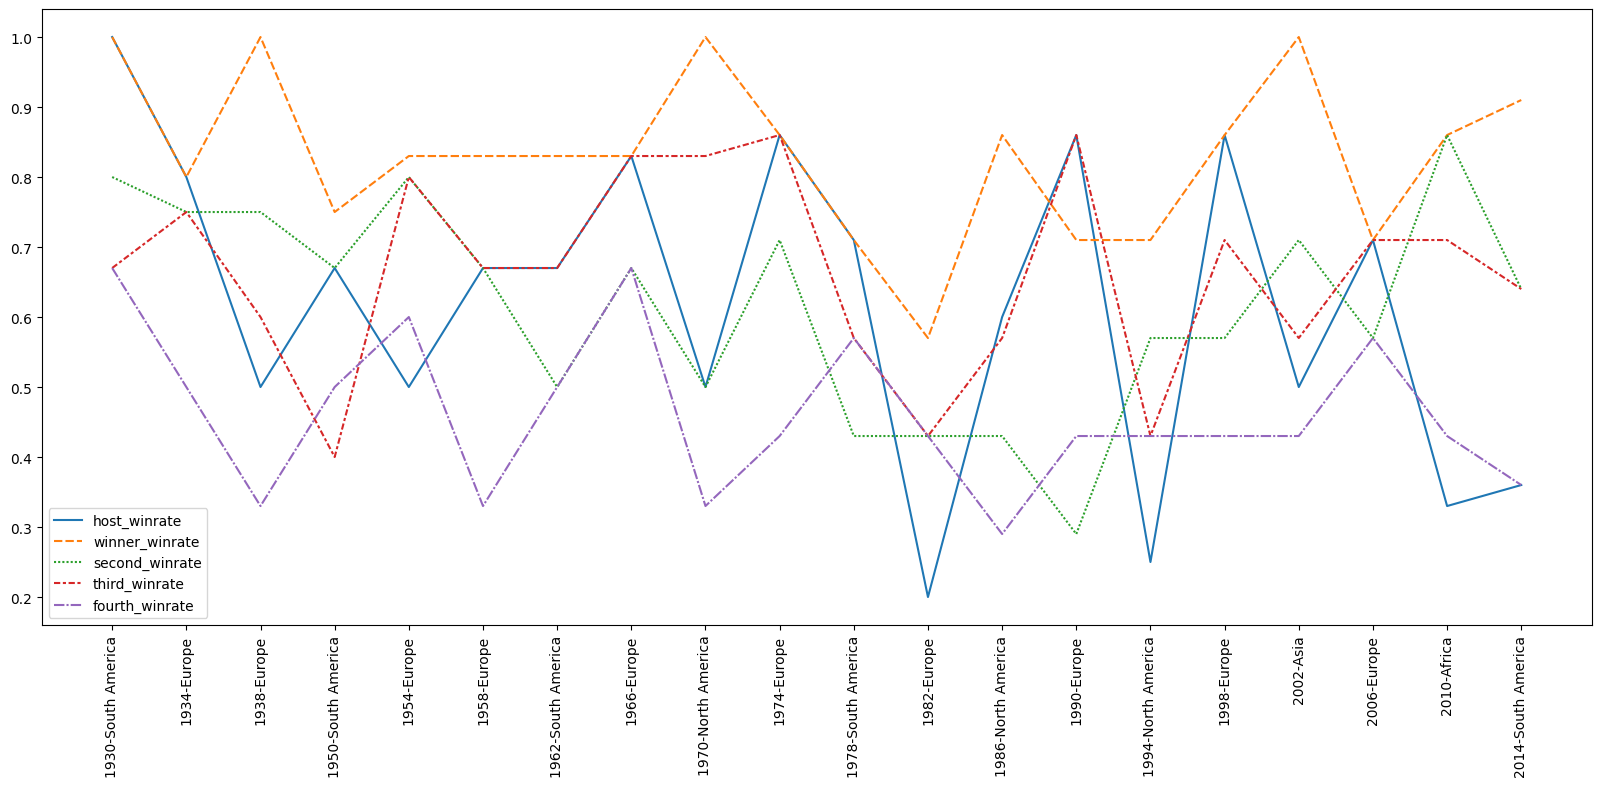

In [213]:

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(info_v_df[['host_winrate','winner_winrate','second_winrate','third_winrate','fourth_winrate']])

ax.set_xticks(np.arange(len(info_v_df['year-continent'])))
ax.set_xticklabels(info_v_df['year-continent'].values)
ax.tick_params(axis='x', rotation=90)


<AxesSubplot:xlabel='Year', ylabel='host_winrate'>

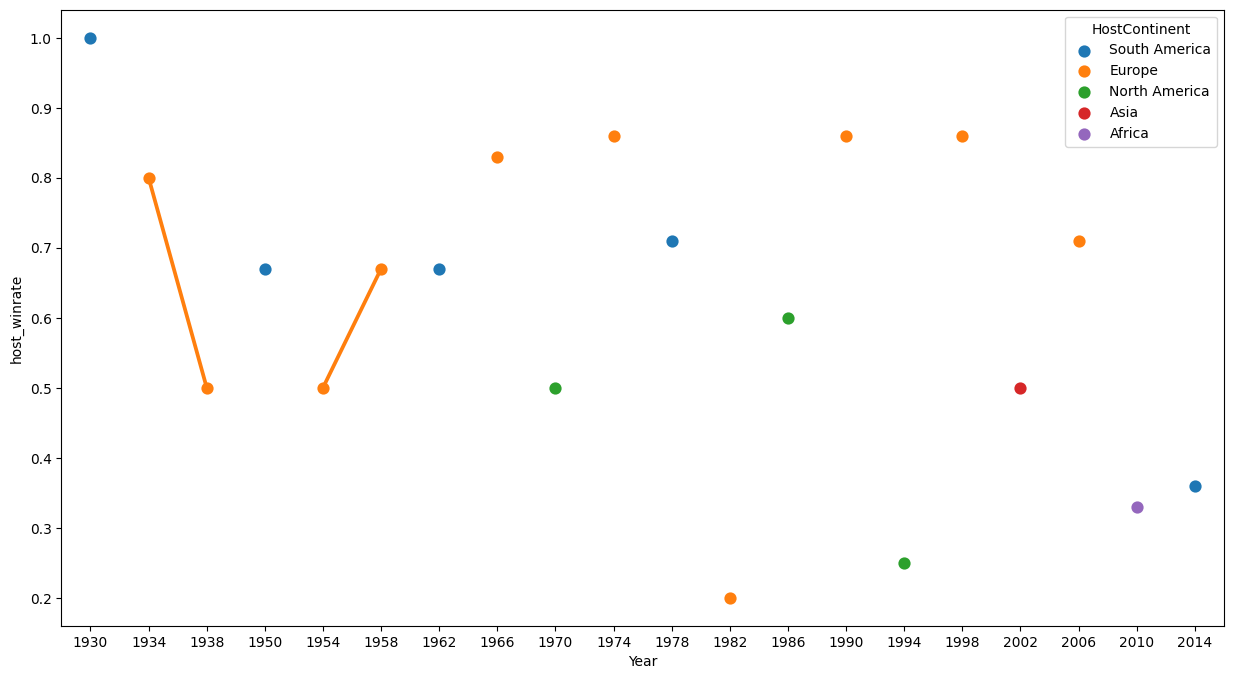

In [203]:
plt.figure(figsize=(15,8))
sns.pointplot(data= info_v_df, x='Year',y='host_winrate',hue='HostContinent')